In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import SGD

import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

# Load and check dataset

170500096/170498071 [==============================] - 26s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


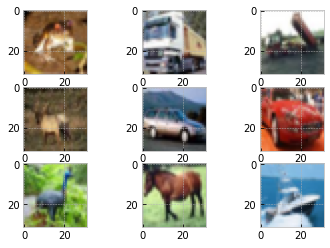

In [2]:
# load dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i])

plt.show()

# Define general functions

In [3]:
# load train and test dataset
def load_dataset():
    # load dataset
    (train_X, train_y), (test_X, test_y) = cifar10.load_data()
    # one hot encode target values
    train_y = to_categorical(train_y)
    test_y = to_categorical(test_y)
    return train_X, train_y, test_X, test_y
 
    
# scale pixels
def preprocess_data(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
    
# plot diagnostic learning curves
def plot_diagnostics(history):
    plt.figure(figsize=(10,10))
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend(loc='best')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend(loc='best')


# Run the test harness for evaluating a model
def run_test_harness(model, batch_size, epochs, model_id):
    # load dataset
    train_X, train_y, test_X, test_y = load_dataset()
    # prepare pixel data
    train_X, test_X = preprocess_data(train_X, test_X)
    # create data generator
    data_gen = ImageDataGenerator(width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  horizontal_flip=True)
    # prepare iterator
    train_iterator = data_gen.flow(train_X, train_y, batch_size=batch_size)
    # fit model
    steps = int(train_X.shape[0] / batch_size)
    history = model.fit_generator(train_iterator, 
                                  steps_per_epoch=steps, 
                                  epochs=epochs, 
                                  validation_data=(test_X, test_y), 
                                  verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_X, test_y, verbose=0)
    print('\nModel accuracy: %.3f' % (acc * 100.0))
    # plot learning curves
    plot_diagnostics(history)
    # save model
    model.save('model_{}.h5'.format(model_id))

# Run CNN model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

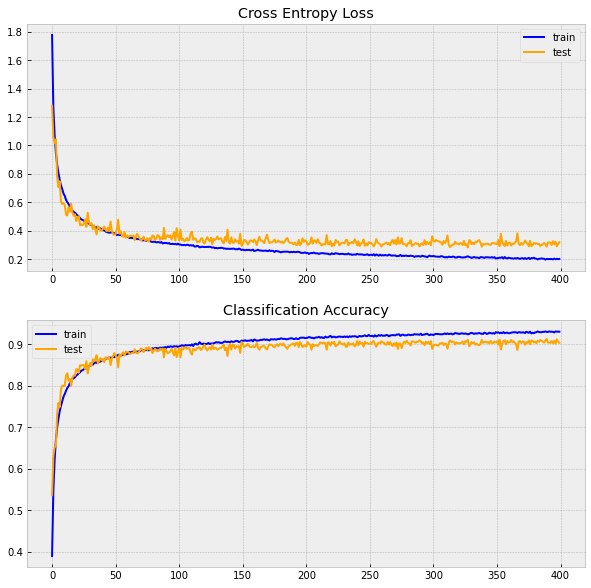

In [5]:
# define CNN model
def define_model():    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model


# create CNN model
cnn_model_01 = define_model()

# entry point, run the test harness
run_test_harness(cnn_model_01, batch_size=64, epochs=400, model_id='2020-08-06-1')

## Model accuracy: 90.41